In [1]:
import pandas as pd
import numpy as np
import numpy.ma as ma
from numpy.lib.stride_tricks import sliding_window_view

import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.dates import DateFormatter

from pathlib import Path

import joblib
import re

from tqdm import tqdm

import exercise_util

  0%|          | 0/1147 [00:00<?, ?it/s]

  0%|          | 0/1066 [00:00<?, ?it/s]

  0%|          | 0/1026 [00:00<?, ?it/s]

  0%|          | 0/991 [00:00<?, ?it/s]

  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/774 [00:00<?, ?it/s]

  0%|          | 0/840 [00:00<?, ?it/s]

  0%|          | 0/736 [00:00<?, ?it/s]

  0%|          | 0/765 [00:00<?, ?it/s]

  0%|          | 0/536 [00:00<?, ?it/s]

  0%|          | 0/994 [00:00<?, ?it/s]

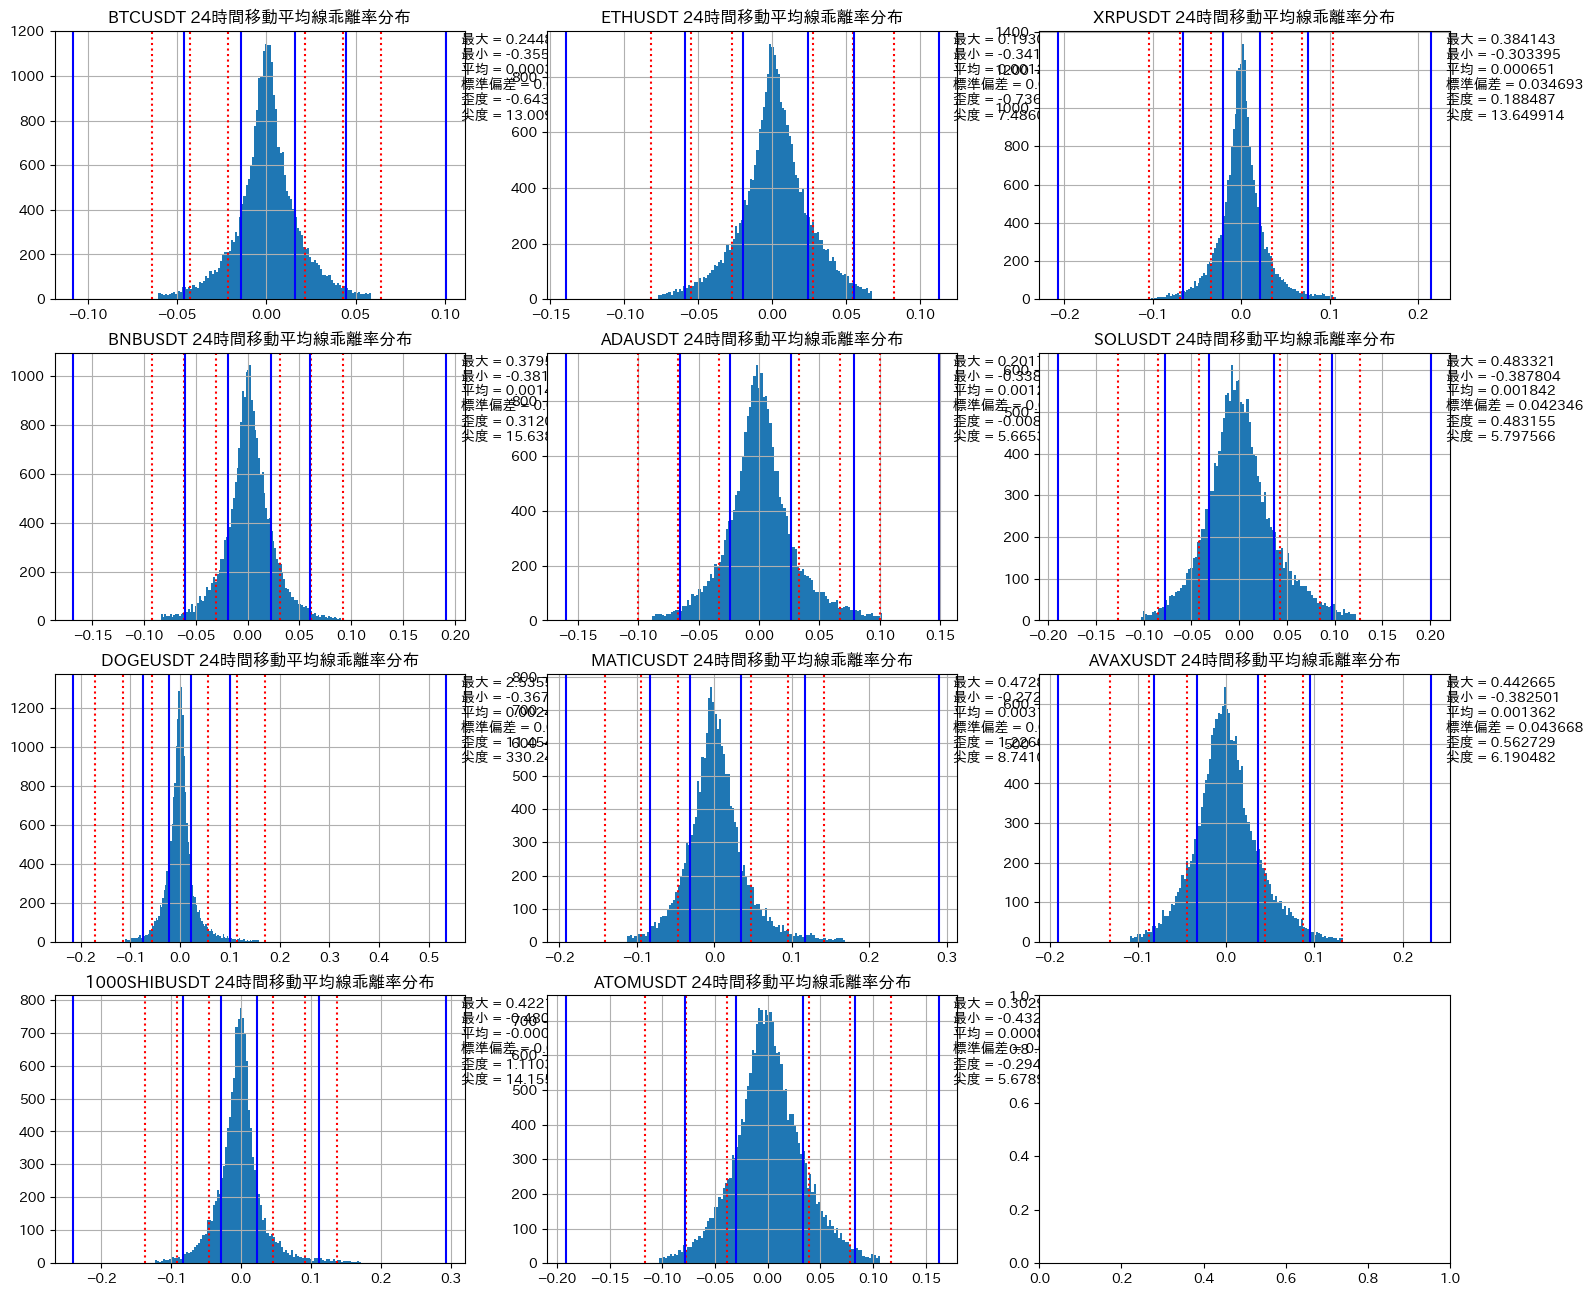

In [17]:
_target_symbols = list(exercise_util.target_symbols.keys())

_cols = 3
_rows = int(np.ceil(len(_target_symbols) / _cols))
_fig, _axs = plt.subplots(_rows, _cols, figsize = (6 * _cols, 4 * _rows))

_window = 24

for _idx, _symbol in enumerate(_target_symbols):
    _ax = _axs[_idx // _cols, _idx % _cols]

    _df_timebar = exercise_util.concat_timebar_files(_symbol, 3600)

    _series_ma = _df_timebar['close'].rolling(_window).mean()
    _series_ma_deviation = (_df_timebar['close'] - _series_ma) / _series_ma
    _series_ma_deviation = _series_ma_deviation.dropna()

    _mean = _series_ma_deviation.mean()
    _std = _series_ma_deviation.std()
    _statistics_str = f'最大 = {_series_ma_deviation.max():.6f}\n最小 = {_series_ma_deviation.min():.6f}\n平均 = {_mean:.6f}\n標準偏差 = {_std:.6f}\n歪度 = {_series_ma_deviation.skew():.6f}\n尖度 = {_series_ma_deviation.kurt():.6f}'

    #_result = adfuller(_series_ma_deviation)
    #_series_output = pd.Series(_result[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    #print(f'ADF test close deviation from {_window} MA')
    #print(_series_output)

    _series_ma_deviation[(_series_ma_deviation < _series_ma_deviation.quantile(0.99)) & (_series_ma_deviation > _series_ma_deviation.quantile(0.01))].hist(bins = 100, ax = _ax)
    _ax.axvline(_std, linestyle = 'dotted', color = 'red')
    _ax.axvline(-1 * _std, linestyle = 'dotted', color = 'red')
    _ax.axvline(2 * _std, linestyle = 'dotted', color = 'red')
    _ax.axvline(-2 * _std, linestyle = 'dotted', color = 'red')
    _ax.axvline(3 * _std, linestyle = 'dotted', color = 'red')
    _ax.axvline(-3 * _std, linestyle = 'dotted', color = 'red')

    _ax.axvline(_series_ma_deviation.quantile(0.5 - 0.6827 / 2), linestyle = 'solid', color = 'blue')
    _ax.axvline(_series_ma_deviation.quantile(0.5 + 0.6827 / 2), linestyle = 'solid', color = 'blue')
    _ax.axvline(_series_ma_deviation.quantile(0.5 - 0.9545 / 2), linestyle = 'solid', color = 'blue')
    _ax.axvline(_series_ma_deviation.quantile(0.5 + 0.9545 / 2), linestyle = 'solid', color = 'blue')
    _ax.axvline(_series_ma_deviation.quantile(0.5 - 0.9973 / 2), linestyle = 'solid', color = 'blue')
    _ax.axvline(_series_ma_deviation.quantile(0.5 + 0.9973 / 2), linestyle = 'solid', color = 'blue')

    _ax.text(0.99, 0.99, _statistics_str, va = 'top', ha = 'left', transform = _ax.transAxes)
    _ax.set_title(f'{_symbol} 24時間移動平均線乖離率分布')

_fig.show()